# Spike Trains
We can represent the occurence of spikes over time as binary events with 1 indicating  "spike" and 0 indicating "no spike." Assume we have a neuron that is alive, capable of sending spikes, generally does not spike in the dark, and will send some amount of spikes if you shine a green light (wavelength of 550 nm) on it. This simulates *optogenetics*, where neurons increase theeir activity in response to light (Boyden et al, 2005; Tye & Deisseroth, 2012). We have a recording electrode to indicate if the neuron is spiking over time represented in the vector $[0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0]$ Lets call this vector spikeTrain. 

In [2]:
spikeTrain = [0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0]
print("Number of spikes = {}".format(sum(spikeTrain)))
print("Length of spike train = {}".format(len(spikeTrain)))

Number of spikes = 4
Length of spike train = 21


We can also indicate the time points with green light on in a stimulus vector with bold print corresponding to green light on and regular print corresponding to green light off. The stimulus vector is \[0,1,2,3,4,**5,6,7,8,9,10,11,12,13**,14,15,16,17,18,19,20] 
Lets assume now that each time point in the stimulus vector is in milliseconds. We can see at 5 ms the green light was turned on and stays on for 9 ms. We are now able to determine a characteristic feature of the neuron: *"first spike latency to stimulus"*

First, lets see if the neuron is spiking at time $t = 5$

In [3]:
spikeTrain[5]

0

The neuron is not spiking at $t=5$ so lets check all time points after. The following output represents the neuron's spiking activity after the green light is turned on. We can see that there is a response latency. 

In [4]:
spikeTrain[5:]

[0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0]

The time it takes for the first spike to occur after the onset of light is a reasonable measure for us to measure this latency. Lets find the first value that represents a spike

In [5]:
spikeTrain[5:].index(1)

4

We can see that the latency to first spike is 4 ms. (Techincally, it returns the
number of bins between light onset and the first spike, but the bin width is 1 ms so we can interpret the result as a time) To add flexibility we can use variables instead of hardcoding

In [6]:
lightOnsetTime = 5 
spikeValue = 1 
latencyToFirstSpike = spikeTrain[lightOnsetTime:].index(spikeValue)
print("Latency to first spike = {}".format(latencyToFirstSpike))

Latency to first spike = 4


Now, lets plot the spiking activity. First, find all of the times the neuron spikes. 

In [7]:
spikeTimes = [i for i,x in enumerate(spikeTrain) if x ==1]
print("spike times = {}".format(spikeTimes))

spike times = [9, 11, 13, 17]


## Raster Plots
Import matplotlib for plotting

In [8]:
import matplotlib.pyplot as plt
import numpy as np

Lets create our first plot 

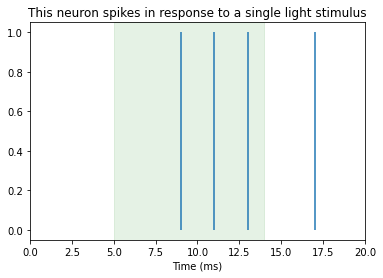

In [9]:
#create a figure
fig = plt.figure()
#create a subplot, we only need one because were plotting a small set of spikes
ax=plt.subplot(111)
#spike raster plot with spikes represented as vertical lines
plt.vlines(spikeTimes, 0, 1)
#shade green when the light is on
plt.axvspan(5,14,alpha=0.1, color = 'g')
#set the range of x axis
plt.xlim([0,20])
#add labels for clarity
plt.title("This neuron spikes in response to a single light stimulus")
plt.xlabel("Time (ms)")
plt.show(block=False)



Data from a single trial is rarely sufficient. There may be a mechanism inside the neuron causing it to spike unreliably or perhaps we are recording in a noisy environment. Lets look at data from multiple trials: 10 spike trains and 10 identical green light stimuli. 

In [10]:
tenSpikeTrains = [[0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0],[0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,
0,1,0,0,0],[0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0],[0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0],[0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0],[0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,1,0,0],[1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0],[0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,1,1,0,0,0],[0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0]]
print("# of spike trains in tenSpikeTrains = {}".format(len(tenSpikeTrains)))
print("Spike Train 0 = {}".format(tenSpikeTrains[0]))
print("Spike Train 1 = {}\n...\nSpike Train 9 = {}".format(tenSpikeTrains[1],tenSpikeTrains[9]))


# of spike trains in tenSpikeTrains = 10
Spike Train 0 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0]
Spike Train 1 = [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0]
...
Spike Train 9 = [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0]


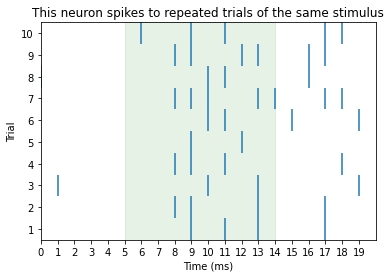

In [11]:
fig = plt.figure()
ax=plt.subplot(111)
for trial in range(len(tenSpikeTrains)):
    spikeTimes = [i for i,x in enumerate(tenSpikeTrains[trial]) if x ==1]
    plt.vlines(spikeTimes,trial,trial+1)
#shade green when the light is on
plt.axvspan(5,14,alpha=0.1, color = 'g')
#set the range of x axis any y axis
plt.xlim([0,20])
plt.ylim([0,10])
#add labels for clarity
plt.title("This neuron spikes to repeated trials of the same stimulus")
plt.xlabel("Time (ms)")
plt.ylabel("Trial")
plt.yticks([x+0.5 for x in range(10)],[str(x+1) for x in range(10)])
plt.xticks(range(0,20))
plt.show(block=False)


The above raster plot shows raw spike times across ten trials. This gives us a qualitative sense of the spiking characteristics of the neuron. As an example, we can note that the neuron generally responds within 3-5 ms of the green light onset and also mantains activity to some degree after the green light is turned off. The original observation that the neuron spikes 4 ms after the onset of light is clearly not constant across all trials. 

## Peri-stimulus time histograms (PSTH)
Lets now hypothesize that the neuron fires tonically at a rate of 500 spikes per second to green light stimuli. *Tonic firing* is sustained spiking activity as opposed to *phasic* or *transient* firing which is locked to the timing of the stimulus. 500 spikes per second is equivalent to 4.5 spikes for the duration of the 9 ms green light stimulus. We can use *peri-stimulus time histograms* or PSTH to visualize the spiking activity of a neuron over time as a bar graph. 

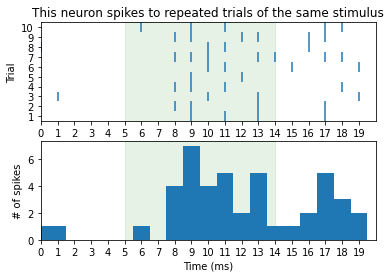

In [12]:
#Figure for Raster Plot and PSTH
fig = plt.figure()
fig.tight_layout()
#Raster subplot
ax = plt.subplot(211)
for trial in range(len(tenSpikeTrains)):
    spikeTimes = [i for i,x in enumerate(tenSpikeTrains[trial]) if x ==1]
    plt.vlines(spikeTimes,trial,trial+1)
plt.axvspan(5,14,alpha=0.1, color = 'g')
plt.xlim([0,20])
plt.ylim([0,10])
plt.title("This neuron spikes to repeated trials of the same stimulus")
plt.ylabel("Trial")
plt.xticks(range(0,20))
plt.yticks([x+0.5 for x in range(10)],[str(x+1) for x in range(10)])

#PSTH subplot
ax = plt.subplot(212)
plt.axvspan(5,14,alpha=0.1, color = 'g')
ax.bar(np.arange(21),np.sum(tenSpikeTrains,0),1)
plt.xlim([0,20])
plt.xticks(range(0,20))
plt.xlabel("Time (ms)")
plt.ylabel("# of spikes")
plt.show()


Lets now plot a new figure in which we scale the number of spike occurrences at each time by the number of stimulus trials. This plot will show, on average, how often the neuron spikes at each time point and give an estimate for the *spike probability* for each point in time.

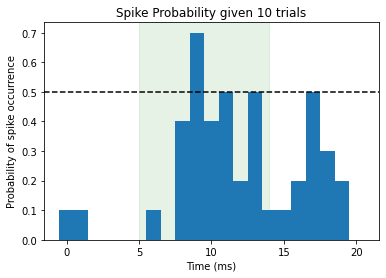

In [13]:
fig = plt.figure()
plt.axvspan(5,14,alpha=0.1, color = 'g')
plt.bar(np.arange(21), np.mean(tenSpikeTrains,0),1)
plt.axhline(y=0.5,xmin=0,xmax=20,linestyle='--',color="k")
plt.title('Spike Probability given 10 trials')
plt.xlabel("Time (ms)")
plt.ylabel("Probability of spike occurrence")
plt.show()


Going back to our hypothesis that the neuron fires tonically at a rate of 500 spikes per second to green light stimuli, we can see there are several phenomena inconsistent with this hypothesis. For example, there is a latency period before the spikes start and there is a phasic component of high spike probability around 4 ms after stimulus onset ($t =9$ms). 

Lets see what happens if we vary the intensity of light. We now hypothesize that the neuron fires more spikes with a shorter latency for brighter stimuli.

First load tenIntensities.pkl, a python dictionary with keys as 'n_intensity' where n is the intensity of the stimulus $0 \leq n \leq 9$. The values are a list of ten spike time lists.

In [14]:
import pickle
with open('/Users/nickhahn/Desktop/VS_CODE/Neural_Data_Science/tenIntensities.pkl', 'rb') as handle:
    u = pickle._Unpickler(handle)
    u.encoding = 'latin1'
    tenIntensities = u.load()
print("keys = {}".format(tenIntensities.keys()))
print("tenIntensities['4_intensity'] = {}".format(tenIntensities['4_intensity']))

keys = dict_keys([&#39;4_intensity&#39;, &#39;2_intensity&#39;, &#39;8_intensity&#39;, &#39;0_intensity&#39;, &#39;7_intensity&#39;, &#39;5_intensity&#39;, &#39;9_intensity&#39;, &#39;6_intensity&#39;, &#39;3_intensity&#39;, &#39;1_intensity&#39;])
tenIntensities[&#39;4_intensity&#39;] = [[11.0, 10.0, 33.0, 32.0], [4.0, 30.0, 32.0, 35.0], [17.0, 11.0, 30.0, 20.0, 34.0], [22.0, 34.0], [7.0, 20.0, 27.0, 32.0], [25.0, 29.0, 13.0, 35.0, 33.0], [32.0, 20.0, 24.0, 30.0], [31.0, 19.0, 29.0, 33.0], [15.0, 13.0, 35.0, 38.0], [25.0, 24.0, 31.0, 31.0]]


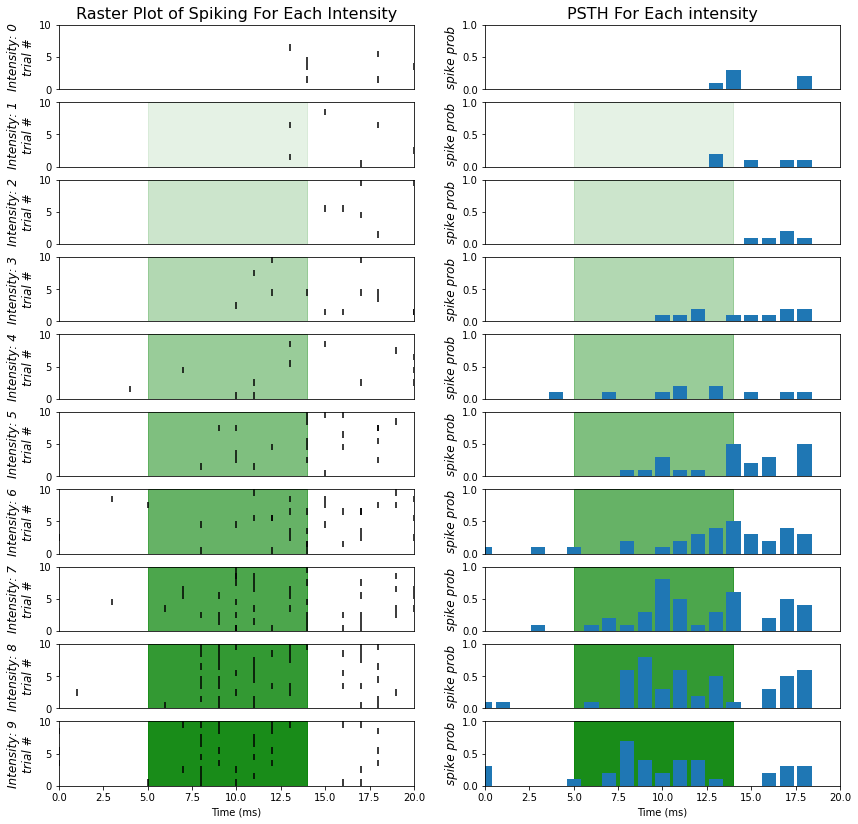

In [25]:
fig = plt.figure(figsize=(14,14))
numIntensities = len(tenIntensities)
nbar = {}
for key in tenIntensities.keys():
    k=float(key[0])
    ax=plt.subplot(numIntensities,2,k*2+1)
    for trial in range(10):
        plt.vlines(tenIntensities[key][trial],trial,trial+1, colors='k')
    plt.xlim([0,20])
    plt.ylim([0,10])
    plt.ylabel('Intensity: {}\ntrial #'.format(str(key[0])), style = "italic",fontsize=12)
    plt.yticks(fontsize=10)
    plt.axvspan(5,14,alpha=0.1*k,color='g')
    if k<9:
        plt.xlabel('')
        plt.xticks([])
    else:
        plt.xlabel("Time (ms)")
    if k==0:
        plt.title('Raster Plot of Spiking For Each Intensity', fontsize=16)
    ax=plt.subplot(numIntensities,2,k*2+2)
    plt.axvspan(5,14,alpha=0.1*k,color='g')
    spikeTimes = [a for b in tenIntensities[key] for a in b] #1
    nOut,bins=np.histogram(spikeTimes,bins=range(20))
    nbar[k] = nOut/10.
    plt.bar(bins[:-1],nOut/10.)
    plt.xlim([0,20])
    plt.ylim([0,1])
    plt.yticks(fontsize=10)
    plt.ylabel('spike prob',style='italic',fontsize = 12)
    if k == 0:
        plt.title('PSTH For Each intensity',fontsize=16)
    if k < numIntensities-1:
        plt.xlabel(''); plt.xticks([])
    else:
        plt.xlabel('Time (ms)')

    


Text(0, 0.5, &#39;mean spikes per time bin&#39;)

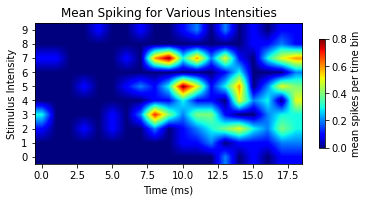

In [16]:
fig = plt.figure()
ax = plt.subplot(111)
aa = ax.imshow(nbar.values(),cmap='jet',interpolation='bilinear')
plt.yticks(range(10),[str(x) for x in range(10)[::-1]])
plt.title('Mean Spiking for Various Intensities')
plt.ylabel('Stimulus Intensity')
plt.xlabel('Time (ms)')
cb=fig.colorbar(aa, shrink=0.5)
cb.ax.set_ylabel('mean spikes per time bin')